<a href="https://colab.research.google.com/github/a-y-a-n-das/Cement_Strength_LR_model/blob/main/Predicting_Cement_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [30]:
cols  = [
    "Cement",
    "Blast_Furnace",
    "Fly_Ash",
    "Water",
    "Superplasticizer",
    "Coarse_Aggregate",
    "Fine_Aggregate",
    "Age",
    "CC_strength"
]
df = pd.read_excel("Concrete_Data.xls", names=cols)

In [43]:
_df = df
#df = df.drop(["Coarse_Aggregate", "Fine_Aggregate", "Blast_Furnace"], axis=1)
row_to_remove= df[df["Superplasticizer"]==0].index
df = df.drop(row_to_remove)
#row_to_remove


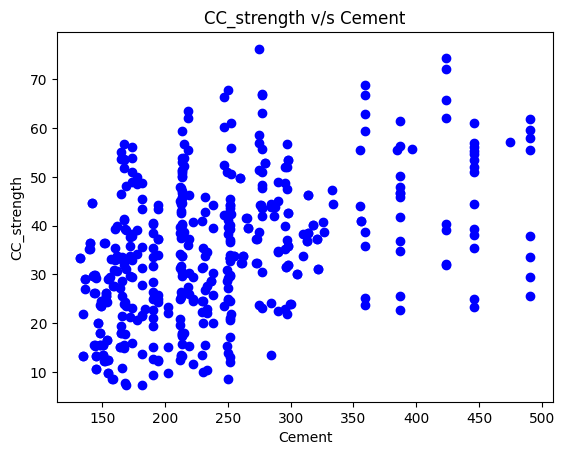

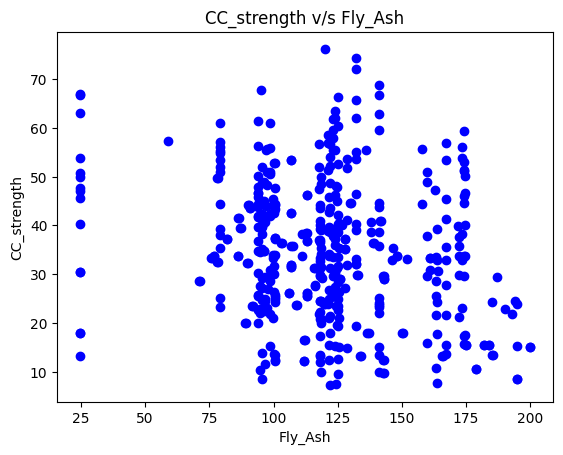

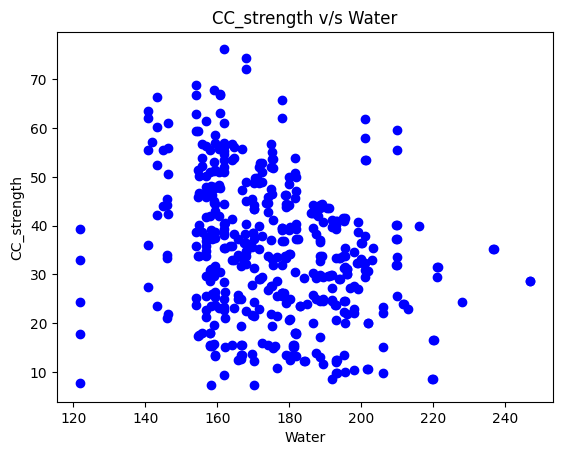

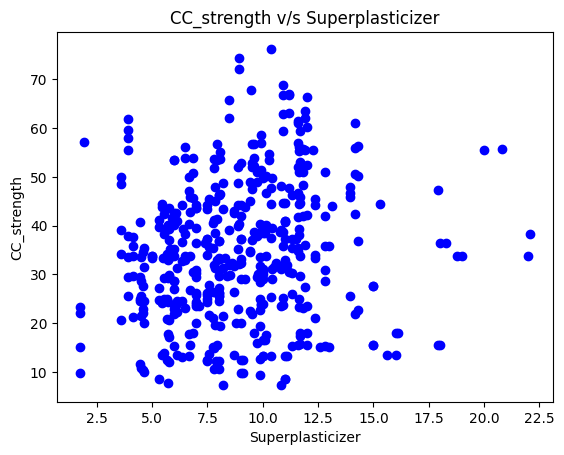

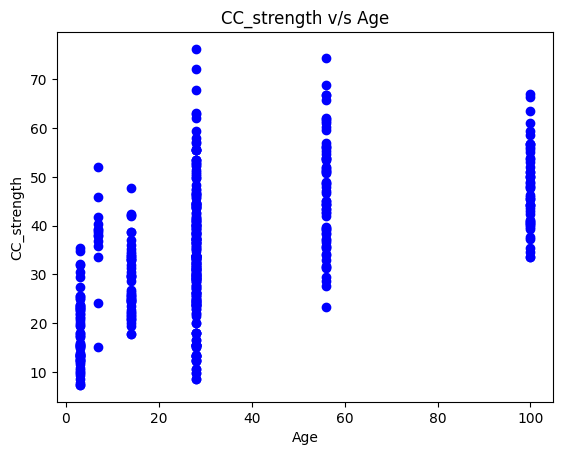

In [44]:
for label in df.columns[:-1]:
    plt.scatter(df[label], df["CC_strength"], color= 'b')
    plt.title(f"CC_strength v/s {label}")
    plt.xlabel(label)
    plt.ylabel("CC_strength")
    plt.show()

In [54]:
train, test = np.split(df.sample(frac=1), [int(0.7*len(df))])
#train.head()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Cement,Fly_Ash,Water,Superplasticizer,Age,CC_strength
184,222.36,96.67,189.29,4.46,3,11.576302
185,222.36,96.67,189.29,4.46,14,24.448819
186,222.36,96.67,189.29,4.46,28,24.890084
187,222.36,96.67,189.29,4.46,56,29.447520
188,222.36,96.67,189.29,4.46,100,40.713558


In [59]:
X_train, y_train = train.drop(["CC_strength"], axis =1), train["CC_strength"]
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [61]:
X_test , y_test = test.drop(["CC_strength"], axis=1), test["CC_strength"]

In [63]:
y_pred = lr_model.predict(X_test)

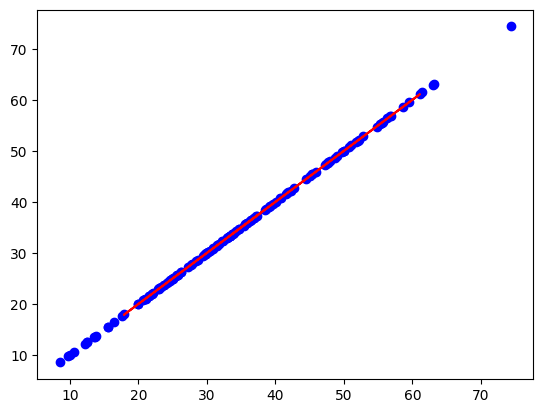

In [68]:
plt.scatter(y_test, y_test, color ='b')
plt.plot(y_pred, y_pred, color = 'r')
plt.show()

In [89]:
def mse(x, y):
    d = np.subtract(y,x)
    d = [i**2 for i in d]
    return  np.mean((np.array(x)-np.array(y))**2)


In [90]:
mse(y_test, y_pred)

68.31928677597513

In [85]:
a =[1,6,4]
b=[2,5,7]
d= np.subtract(b,a)
d = d.astype(float)
d= [i**2 for i in d]
sum(d)

11.0

In [94]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [98]:
rmse

8.265548183633989

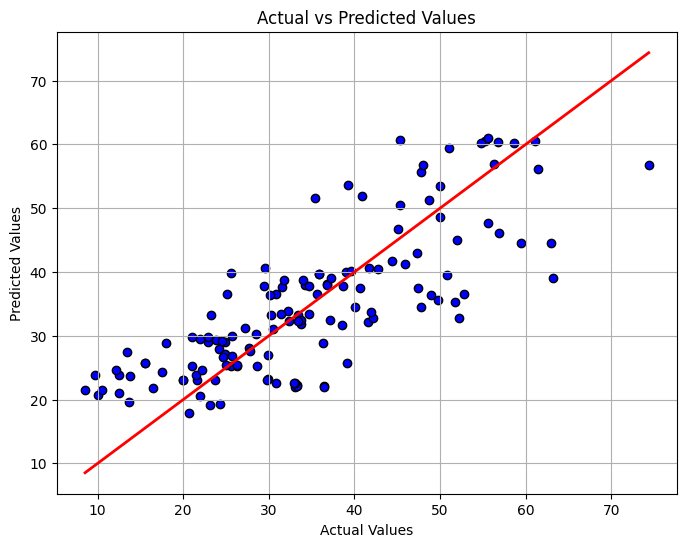

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()